In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Downloading Dataset

In [4]:
adsales=pd.read_csv('/content/advertising.csv')

In [11]:
adsales.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Dataset Observations

In [9]:
adsales.shape

(200, 4)

In [10]:
adsales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data cleaning

In [13]:
adsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
adsales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
adsales.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Data Visualization

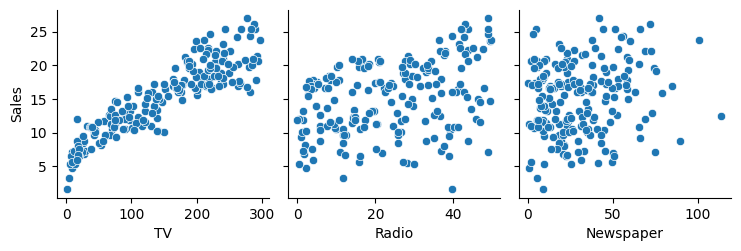

In [18]:
sns.pairplot(adsales,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

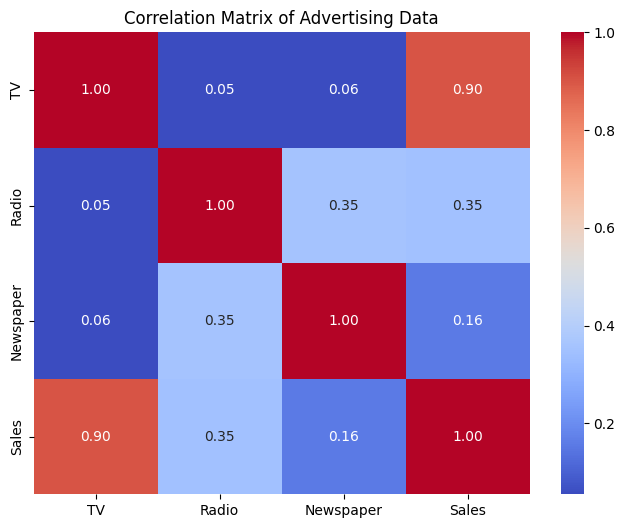

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(adsales.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Data')
plt.show()

Let's visualize the distribution of each variable to see their spread.

Now, let's visualize the relationship between each advertising channel and sales using scatter plots with regression lines.

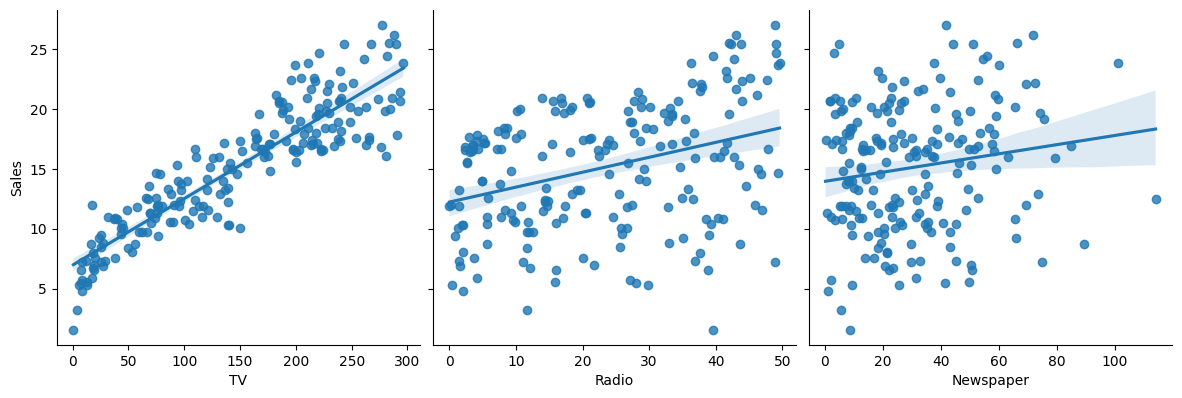

In [22]:
sns.pairplot(adsales, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.show()

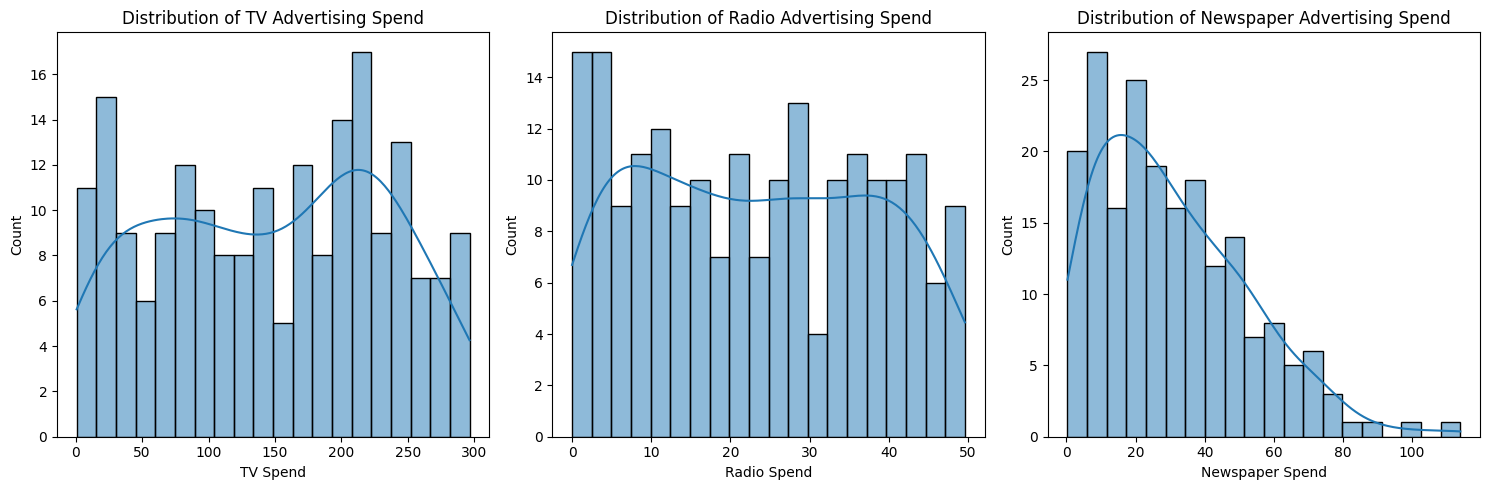

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(ax=axes[0], data=adsales, x='TV', bins=20, kde=True)
axes[0].set_title('Distribution of TV Advertising Spend')
axes[0].set_xlabel('TV Spend')
axes[0].set_ylabel('Count')

sns.histplot(ax=axes[1], data=adsales, x='Radio', bins=20, kde=True)
axes[1].set_title('Distribution of Radio Advertising Spend')
axes[1].set_xlabel('Radio Spend')
axes[1].set_ylabel('Count')

sns.histplot(ax=axes[2], data=adsales, x='Newspaper', bins=20, kde=True)
axes[2].set_title('Distribution of Newspaper Advertising Spend')
axes[2].set_xlabel('Newspaper Spend')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Task
Analyze the provided advertising dataset to understand the relationship between advertising channels (TV, Radio, Newspaper) and sales. Build a linear regression model to predict sales based on advertising spend. Evaluate the model's performance and interpret the coefficients to determine the impact of each advertising channel on sales. Explain the results and suggest potential next steps.

## Prepare the data

### Subtask:
Separate the features (advertising channels) from the target variable (sales).


**Reasoning**:
Create the feature DataFrame X and the target Series y from the adsales DataFrame.



In [25]:
X = adsales[['TV', 'Radio', 'Newspaper']]
y = adsales['Sales']

## Split the data

### Subtask:
Divide the dataset into training and testing sets to evaluate the model's performance.


**Reasoning**:
Split the data into training and testing sets.



In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train)

        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]


In [35]:
print(y_train)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64


In [36]:
print(X_test)

        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   4

In [37]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


## Build the linear regression model

### Subtask:
Train a linear regression model using the training data.


**Reasoning**:
Train a linear regression model using the training data.



In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
res=model.predict(X_test)
res

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [40]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [41]:
model.intercept_

np.float64(4.714126402214127)

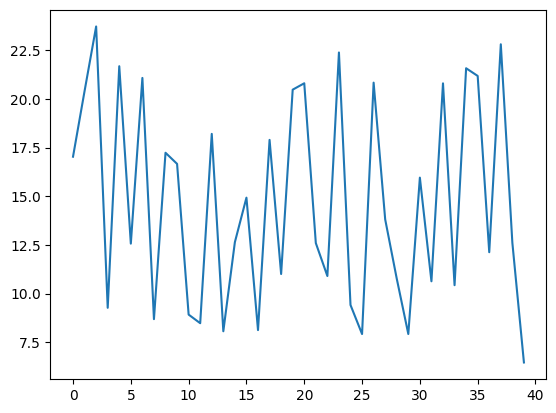

In [42]:
plt.plot(res)

## Evaluate the model

### Subtask:
Assess the performance of the trained model using the testing data.


**Reasoning**:
Calculate MSE and R2 score of the trained model on the test set.



In [43]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 2.91
R-squared (R2): 0.91


## Interpret the model results

### Subtask:
Understand the coefficients of the model to see the impact of each advertising channel on sales.


**Reasoning**:
Access and print the coefficients and intercept of the trained linear regression model to understand the impact of each advertising channel on sales.



In [29]:
print('Model Coefficients:')
for i, col in enumerate(X_train.columns):
    print(f'{col}: {model.coef_[i]:.2f}')

print(f'\nModel Intercept: {model.intercept_:.2f}')

Model Coefficients:
TV: 0.05
Radio: 0.10
Newspaper: 0.00

Model Intercept: 4.71


**Interpretation of Coefficients:**

*   **Intercept:** The intercept represents the estimated average sales when the spending on all advertising channels (TV, Radio, Newspaper) is zero.
*   **TV Coefficient:** The coefficient for TV indicates the estimated change in sales for a one-unit increase in TV advertising spend, assuming Radio and Newspaper spending are held constant.
*   **Radio Coefficient:** The coefficient for Radio indicates the estimated change in sales for a one-unit increase in Radio advertising spend, assuming TV and Newspaper spending are held constant.
*   **Newspaper Coefficient:** The coefficient for Newspaper indicates the estimated change in sales for a one-unit increase in Newspaper advertising spend, assuming TV and Radio spending are held constant.

Based on the coefficients, you can see which advertising channels have the most significant impact on sales. A larger positive coefficient suggests a stronger positive impact.